In [1]:
import warnings
warnings.filterwarnings("ignore")

# POS Chunking
**1. Create a chunker that detects noun-phrases (NPs) and lists the NPs in the text below.**

- Both [NLTK](https://www.nltk.org/book/ch07.html) and [spaCy](https://spacy.io/api/matcher) supports chunking
- Look up RegEx parsing for NLTK and the document object for spaCy.
- Make use of what you've learned about tokenization.

In [2]:
text = "The language model predicted the next word. It was a very nice word!"
# TODO: set up a pos tagger and a chunker.
# Output: a list of all tokens, grouped as noun-phrases where applicable

In [3]:
# LF
# Expect a system with either regex or with a high-level implementation, .e.g in spaCy
print("with NLTK:")
from nltk import word_tokenize, pos_tag
from nltk import RegexpParser

tokens = word_tokenize(text)
pos_tags = pos_tag(tokens, tagset='universal')
NP_grammar = """
    NP: {<DET>?<ADJ>*<NOUN>+}
"""
chunker = RegexpParser(NP_grammar)
for subtree in chunker.parse(pos_tags).subtrees():
    if subtree.label() == "NP":
        print(subtree.leaves())

print("With spaCy:")
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
for np in doc.noun_chunks:  # <-- this is automatically parsed in the model
    print([(token.text, token.pos_) for token in np])

with NLTK:
[('The', 'DET'), ('language', 'NOUN'), ('model', 'NOUN')]
[('the', 'DET'), ('next', 'ADJ'), ('word', 'NOUN')]
[('nice', 'ADJ'), ('word', 'NOUN')]
With spaCy:
[('The', 'DET'), ('language', 'NOUN'), ('model', 'NOUN')]
[('the', 'DET'), ('next', 'ADJ'), ('word', 'NOUN')]
[('It', 'PRON')]
[('a', 'DET'), ('very', 'ADV'), ('nice', 'ADJ'), ('word', 'NOUN')]


**2. Modify the chunker to handle verb-phases (VPs) as well.**
- This can be done by using a RegEx parser in NLTK or using a spaCy Matcher.

In [4]:
# TODO: set up grammars to chunk VPs

grammar = """
    VP: {MYGRAMMAR}
"""

In [5]:
# LF
print("Verb-phrase matching")
print("With NLTK:")
grammar = """
    VP: {<VERB><DET>?<ADJ>?<NOUN>+}
    NP: {<DET>?<ADJ>*<NOUN>+}
"""
chunker = RegexpParser(NP_grammar)
for subtree in chunker.parse(pos_tags).subtrees():
    if subtree.label() == "NP":
        print(subtree.leaves())

print("With spaCy Matcher:")
vp = [
    {'POS': 'VERB', 'OP': '+'},
    {'POS': 'DET', 'OP': '?'},
    {'POS': 'ADJ', 'OP': '*'},
    {'POS': 'NOUN', 'OP': '+'}
]
np = [
    {'POS': 'DET', 'OP': '{1}'},
    {'POS': 'ADJ', 'OP': '*'},
    {'POS': 'NOUN', 'OP': '+'}
]
matcher = Matcher(nlp.vocab)
matcher.add("verb_phrase", [vp])
matcher.add("noun_phrase", [np])

def get_chunks(doc):
    matches = matcher(doc)
    for match_id, start, end in matches:
        span = doc[start:end]
        match_type = nlp.vocab.strings[match_id]
        print([(token.text, token.pos_) for token in span])
        print(f"Match type: {match_type}")
get_chunks(doc)

Verb-phrase matching
With NLTK:
[('The', 'DET'), ('language', 'NOUN'), ('model', 'NOUN')]
[('the', 'DET'), ('next', 'ADJ'), ('word', 'NOUN')]
[('nice', 'ADJ'), ('word', 'NOUN')]
With spaCy Matcher:
[('The', 'DET'), ('language', 'NOUN')]
Match type: noun_phrase
[('The', 'DET'), ('language', 'NOUN'), ('model', 'NOUN')]
Match type: noun_phrase
[('the', 'DET'), ('next', 'ADJ'), ('word', 'NOUN')]
Match type: noun_phrase
[('predicted', 'VERB'), ('the', 'DET'), ('next', 'ADJ'), ('word', 'NOUN')]
Match type: verb_phrase


**3. Verb-phrases (VPs) can be defined by many different grammatical rules. Give four examples.**
- Hint: Context-Free Grammars, chapter 8 in NLTK.

Your answer here!

Expect answers from the NLTK chapter on context-free-grammar, such as
- VP -> V Adj | V NP | V S | V NP PP

This is sort of a trick question, as chatgpt answers:
````
Simple VP: Consists of just a single verb.
Example: "He runs."
Compound VP: Involves multiple verbs joined together.
Example: "She will eat and sleep."
Complex VP: Includes a main verb along with one or more auxiliary verbs or modal verbs.
Example: "They have been studying."
Phrasal Verb: A verb followed by one or more particles (adverbs or prepositions) that together form a single semantic unit.
Example: "He looked up the word in the dictionary."
```

**4. After these applications, do you find chunking to be beneficial in the context of language modeling and next-word prediction? Why or why not?**

Your answer here!

___

# Dependency Parsing

**1. Use spaCy to inspect/visualise the dependency tree of the text provided below.**
- Optional addition: visualize the dependencies as a graph using `networkx`

In [6]:
text = "The language model predicted the next word"
# TODO: use spacy and displacy to visualize the dependency tree

In [7]:
doc = nlp(text)
from spacy import displacy
displacy.render(doc, style="dep", jupyter=True, options={"distance": 100, "compact": True})

([The, language]) model <- predicted
([the, next]) word <- predicted


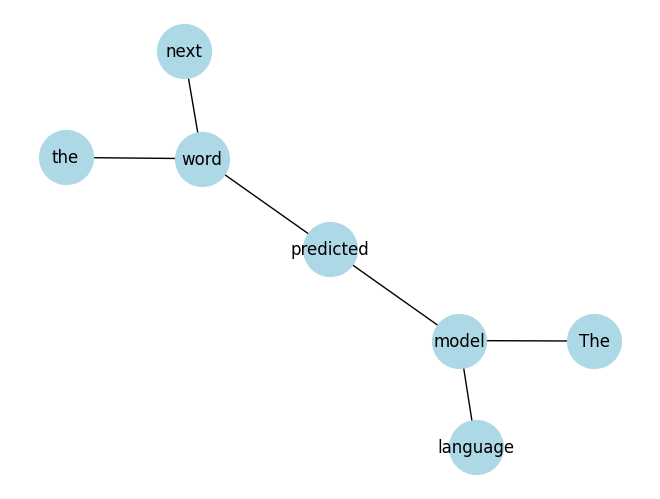

In [8]:
def visualize_deps(doc):
    for token in doc:
        children = [child for child in token.children]
        if len(children) == 0 or token.text == token.head.text:
            continue
        print(f"({children}) {token.text} <- {token.head.text}")

visualize_deps(doc)

import networkx as nx
import matplotlib.pyplot as plt

def visualize_deps_nx(doc):
    G = nx.Graph()
    for token in doc:
        children = [child for child in token.children]
        for child in children:
            G.add_edge(token.text, child.text)
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, alpha=1)
    plt.show()

visualize_deps_nx(doc)

**2. What is the root of the sentence? Attempt to spot it yourself, but the answer should be done by code**

In [9]:
# TODO: implement a function to find the root of the document
# Return both the word and its POS tag
doc = nlp(text)
def find_root(doc):
    for token in doc:
        if token.dep_ == "ROOT":
            return token.text, token.pos_
find_root(doc)

('predicted', 'VERB')

In [10]:
def get_root(doc):
    for token in doc:
        if token.head == token:
            return token
    return None
doc = nlp(text)
root = get_root(doc)
print(f"The root is: {root.text} ({root.pos_})")

The root is: predicted (VERB)


**3. Write a function to get the subject and object of a sentence. Print the results for the sentence above.**

In [11]:
# TODO: implement a function to find the subjects + objects in the document

In [12]:
def get_subject_object(doc):
    subjects = [t for t in doc if "subj" in t.dep_]
    objects = [t for t in doc if "obj" in t.dep_]
    return subjects, objects
subjects, objects = get_subject_object(doc)
print(f"Subjects: {[t.text for t in subjects]}")
print(f"Objects: {[t.text for t in objects]}")

Subjects: ['model']
Objects: ['word']


**4. How would you use the relationships extracted from dependency parsing in language modeling contexts?**

Fully open question, but expect answers such as:
- Using the structure, similarly to pos chunking
- Enforcing certain grammatical rules
- Extracting relationships, to better understand the context of the sentence

___

# Wordnet

**1. Use Wordnet (from NLTK) and create a function to get all synonyms of a word of your choice. Try with "language"**

In [13]:
from nltk.corpus import wordnet as wn
# TODO: find synonyms

In [14]:
# LF

from nltk.corpus import wordnet as wn
def get_synonyms(word):
    synonyms = []
    for synset in wn.synsets(word):
        synonyms.extend(synset.lemma_names())
    return sorted(list(set(synonyms)))

get_synonyms("language")

['language',
 'linguistic_communication',
 'linguistic_process',
 'lyric',
 'nomenclature',
 'oral_communication',
 'speech',
 'speech_communication',
 'spoken_communication',
 'spoken_language',
 'terminology',
 'voice_communication',
 'words']

**2. From the same word you chose, extract an additional 4 or more features from wordnet (such as hyponyms). Describe each category briefly.**

In [15]:
from collections import defaultdict
def get_wordnet_features(word):
    features = defaultdict(list)
    for synset in wn.synsets(word):
        features["lemma_names"].extend(synset.lemma_names())
        features["definition"].append(synset.definition())
        features["hypernyms"].extend(synset.hypernyms())
        features["hyponyms"].extend(synset.hyponyms())
    return {k: set(v) for k, v in features.items()}

get_wordnet_features("language")

{'lemma_names': {'language',
  'linguistic_communication',
  'linguistic_process',
  'lyric',
  'nomenclature',
  'oral_communication',
  'speech',
  'speech_communication',
  'spoken_communication',
  'spoken_language',
  'terminology',
  'voice_communication',
  'words'},
 'definition': {'(language) communication by word of mouth',
  'a system of words used to name things in a particular discipline',
  'a systematic means of communicating by the use of sounds or conventional symbols',
  'the cognitive processes involved in producing and understanding linguistic communication',
  'the mental faculty or power of vocal communication',
  'the text of a popular song or musical-comedy number'},
 'hypernyms': {Synset('auditory_communication.n.01'),
  Synset('communication.n.02'),
  Synset('faculty.n.01'),
  Synset('higher_cognitive_process.n.01'),
  Synset('text.n.01'),
  Synset('word.n.01')},
 'hyponyms': {Synset('artificial_language.n.01'),
  Synset('barrage.n.01'),
  Synset('conversation

___

# Machine Learning Exercise - A sentiment classifier
- A rule-based approach with SentiWordNet + A machine learning classifier

**1. There are several steps required to build a classifier or any sort of machine learning application for textual data. For data including (INPUT_TEXT, LABEL), list the typical pipeline for classification.**

Expect an answer including details from the figures in either NLTK chapter 6 or Kochmar's book, chapter 7.

Select data -> preprocess -> split into train/test -> extract features -> train classifier and evalute


**2. Before developing a classifier, having a baseline is very useful. Build a baseline model for sentiment classification using SentiWordNet.**
- How you decide to aggregate sentiment is up to you. Explain your approach.
- It should report the accuracy of the classifier.

In [16]:
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import wordnet as wn
import spacy
nlp = spacy.load("en_core_web_sm")
universal_to_wn = {"NOUN": "n", "VERB": "v", "ADJ": "a", "ADV": "r"}

def get_sentiment(word, pos=None):
    if pos not in universal_to_wn.keys():
        return 0
    sentiment = 0
    if len(wn.synsets(word)) == 0:
        return sentiment # neutral
    for synset in wn.synsets(word, pos=universal_to_wn[pos]):
        ssyn = swn.senti_synset(synset.name())
        tmp_sent = ssyn.pos_score() - ssyn.neg_score()
        sentiment += tmp_sent
    # average score of all synsets
    avg_word_score = sentiment / len(wn.synsets(word))
    scaling_factor = 2
    return avg_word_score * scaling_factor

def get_sentiment_from_sent(sent):
    doc = nlp(sent)
    tagged = [(token.text, token.pos_) for token in doc if token.is_alpha]
    sentiment = sum([get_sentiment(word, tag) for (word, tag) in tagged])

    # spacy, get only words/alpha
    valid_words = [w for w in doc if w.is_alpha]
    num_words = len(valid_words) or 1
    return sentiment / num_words

def get_sentiment_label(sent, threshold=0.5, ternary=False):
    sentiment = get_sentiment_from_sent(sent)
    label = 0
    if ternary and sentiment < -threshold:
        label = -1
    elif sentiment > threshold:
        label = 1
    return label


In [17]:
some_sents = [
    "I liked it! Did you?",
    "It's not bad but... Nevermind, it is.",
    "It's awful",
    "I don't care if you loved it - it was terrible!",
    "I don't care if you hated it, I think it was awesome"
]
y_true = [1, 0, 0, 0, 1]
# 0: negative, 1: positive

## Evaluation

In [18]:
from sklearn.metrics import accuracy_score
from typing import List

some_sents = [
    "I liked it! Did you?",
    "It's not bad but... Nevermind, it is.",
    "It's awful",
    "I don't care if you loved it - it was terrible!",
    "I don't care if you hated it, I think it was awesome"
]
# 0: negative, 1: positive
true_labels = [1, 0, 0, 0, 1]

############################
# THIS IS ONLY AN EXAMPLE
# FEEL FREE TO CHANGE IT
############################
class MyRulebasedSentimentBaseline:
    def __init__(self):
        pass

    def predict(self, data) -> List[int]:
        # returns 0 for negative, 1 for positive
        # TODO: implement
        return [0 for _ in data]

    def evaluate(self, data, true_labels):
        preds = self.predict(data)
        return accuracy_score(true_labels, preds)

# TODO: get the sentiment labels for the sentences and evaluate
baseline = MyRulebasedSentimentBaseline()
baseline.evaluate(some_sents, y_true)


0.6

In [19]:
# LF 
from typing import List

class MyRulebasedSentimentBaseline:
    def __init__(self):
        pass

    def predict(self, data) -> List[int]:
        # returns 0 for negative, 1 for positive
        return [get_sentiment_label(s, threshold=0.2) for s in data]

    def evaluate(self, data, true_labels):
        preds = self.predict(data)
        return accuracy_score(true_labels, preds)

baseline = MyRulebasedSentimentBaseline()
baseline.evaluate(some_sents, true_labels)

0.6

## Load SST-2 binary sentiment dataset

In [20]:
from sklearn.model_selection import train_test_split
from datasets import load_dataset
dataset = load_dataset("sst2")

train_df = dataset["train"].to_pandas().drop(columns=["idx"])
# we select a tiny subset
train_df = train_df.sample(10000)
# create your own test split
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
print(train_df.label.value_counts())
train_df.head()

1    4446
0    3554
Name: label, dtype: int64


,sentence,label
30591,the wonderfully lush morvern callar is pure pu...,1
62746,daring and verve,1
44522,"an exhausted , desiccated talent who ca n't ge...",0
14007,) debut can be accused of being a bit undiscip...,0
23429,"dark , gritty , sometimes funny little gem",1


In [21]:
print(test_df.label.value_counts())
test_df.head()

1    1087
0     913
Name: label, dtype: int64


,sentence,label
32641,do anything as stomach-turning as the way adam...,0
55204,thoroughly entertaining comedy that,1
42800,"would call it , ` hungry-man portions of bad '",0
28561,into the subculture of extreme athletes whose ...,1
16033,disappointing,0


In [22]:
import random
test_sentences = test_df["sentence"].tolist()
y_test = test_df["label"].tolist()
y_pred = [random.choice([0, 1]) for _ in test_sentences]
print(f"Random guess accuracy: {accuracy_score(y_test, y_pred)}")

Random guess accuracy: 0.4975


In [24]:
# TODO: evaluate your baseline
baseline = MyRulebasedSentimentBaseline()
baseline.evaluate(test_sentences, y_test)

0.5205

**Did you beat random guess?**

If not, can you think of any reasons why?

Your answer here!

## Classification with Naive Bayes and TF-IDF

In [25]:
# TODO: use scikit-learn to...
# - normalize
# - vectorize
# - extract features
# - train a classifier
# - evaluate the classifier using `classification_report` and `accuracy`
# 
# expect an accuracy of > 0.8

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

train_sentences = train_df["sentence"].tolist()
y_true = train_df["label"].tolist()

test_sentences = test_df["sentence"].tolist()
y_test = test_df["label"].tolist()

pipe.fit(train_sentences, y_true)
y_pred = pipe.predict(test_sentences)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       913
           1       0.79      0.91      0.84      1087

    accuracy                           0.82      2000
   macro avg       0.83      0.81      0.81      2000
weighted avg       0.82      0.82      0.81      2000

Accuracy: 0.817


## Optional task: using a pre-trained transformer model
If you wish to push the accuracy as far as you can, take a look at BERT-based or other pre-trained language models. As a starting point, take a look at a model already fine-tuned on the SST-2 dataset: [DistilBERT](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english)

**Advanced:**

Going beyond this, you could look into the addition of a *classification head* on top of the pooling layer of a BERT-based model. This is a common approach to fine-tuning these models on classification or regression problems.